# Medical Insurance Cost Prediction

We have a dataset that contains several informations for an individual and based on them we are going to predict the cost of the medical insurance cost. 

The dataset has informations for:

-Age(age) of the individual

-Gender(sex) of the individual (female/male)

-Body Mass Index(bmi) of the individual (ideally 18.5 to 24.9)

-Smoking habit(smoker) of the individual (yes/no)

-Region(region) from where the individual is from (southwest, northwest, southeast, northeast) in the US

-Individual medical costs(charges) billed by health insurance


In [2]:
# Importing all the modules I will need for this project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Data Analysis

In [3]:
# Looking at the data so we can see with what we are working with
df = pd.read_csv('insurance.csv')
print(df.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [4]:
# The number of rows and columns in the dataframe
df.shape

(1338, 7)

In [5]:
# Transforming the region into a numerical value so later we can train the model
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
# Creating a new dataframe with the region as a numerical value
region_numbers = pd.get_dummies(df['region'], drop_first=True)
region_numbers.head(10)

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,0
9,1,0,0


In [7]:
# Concatenating the region_numbers dataframe with the original dataframe and plus removing the region column
df_region = pd.concat([df, region_numbers], axis=1)
df_region.drop(['region'], axis=1, inplace=True)
df_region.head(10)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0
5,31,female,25.740,0,no,3756.62160,0,1,0
6,46,female,33.440,1,no,8240.58960,0,1,0
7,37,female,27.740,3,no,7281.50560,1,0,0
8,37,male,29.830,2,no,6406.41070,0,0,0
9,60,female,25.840,0,no,28923.13692,1,0,0


In [8]:
# Looking for null values in the dataframe and if we have we need to drop them
df_region.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northwest    0
southeast    0
southwest    0
dtype: int64

In [9]:
# Information about the columns, what type of data is it, etc.
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   uint8  
 7   southeast  1338 non-null   uint8  
 8   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), object(2), uint8(3)
memory usage: 66.8+ KB


In [10]:
# Grouping the dataframe by the age column with mean
df_age = df_region.groupby('age').mean()
print(df_age)

           bmi  children       charges  northwest  southeast  southwest
age                                                                    
18   31.326159  0.449275   7086.217556   0.000000   0.536232   0.000000
19   28.596912  0.426471   9747.909335   0.500000   0.044118   0.455882
20   30.632759  0.862069  10159.697736   0.241379   0.275862   0.275862
21   28.185714  0.785714   4730.464330   0.250000   0.250000   0.250000
22   31.087679  0.714286  10012.932802   0.250000   0.285714   0.214286
23   31.454464  1.000000  12419.820040   0.250000   0.250000   0.250000
24   29.142679  0.464286  10648.015962   0.250000   0.250000   0.250000
25   29.693929  1.285714   9838.365311   0.250000   0.250000   0.250000
26   29.428929  1.071429   6133.825309   0.250000   0.250000   0.250000
27   29.333571  0.964286  12184.701721   0.214286   0.321429   0.214286
28   29.482143  1.285714   9069.187564   0.214286   0.285714   0.250000
29   29.383148  1.259259  10430.158727   0.259259   0.259259   0

In [11]:
# Describing the dataframe to see the mean, std, max, etc.
df_region.describe()

,age,bmi,children,charges,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000


# Data Visualization 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

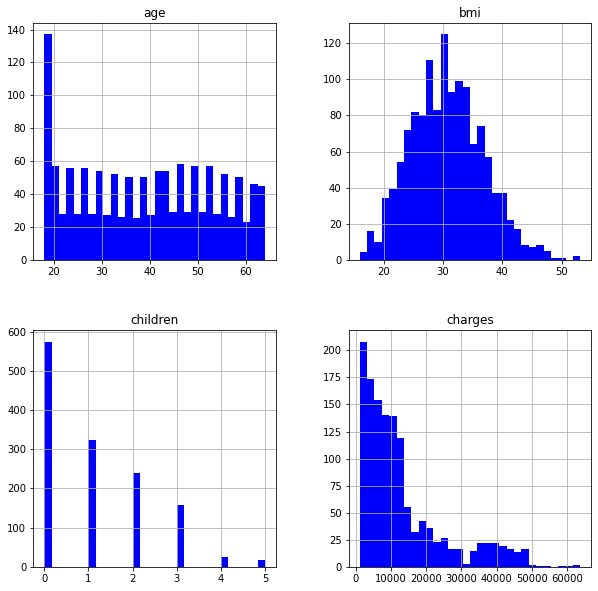

In [12]:
df_region[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins=30, figsize=(10,10),color='blue')

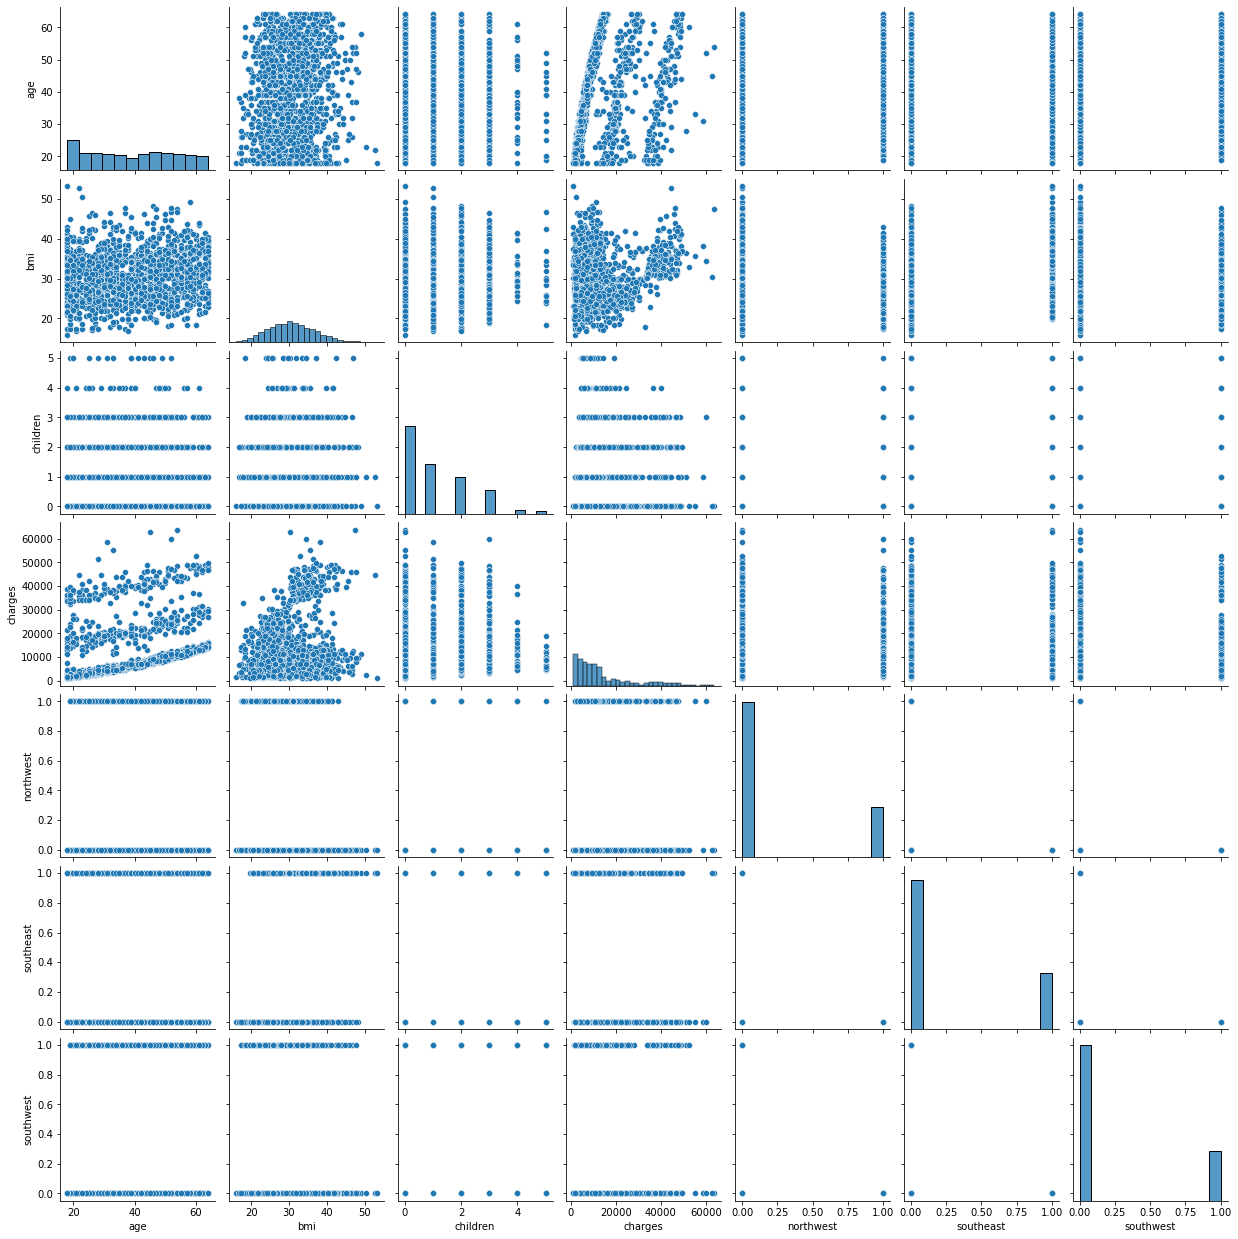

In [13]:
# To see easier the connections between different data inside the dataset 
sns.pairplot(df_region)

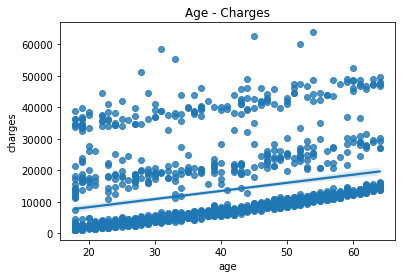

In [14]:
# The relation between age and charges is kinda complex, more complex than linear relationship
sns.regplot(x='age', y='charges', data=df_region)
plt.title("Age - Charges")
plt.show()

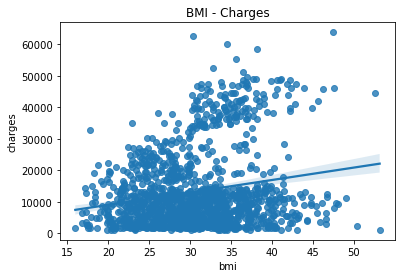

In [15]:
# Also the relation between bmi and charges is kinda complex, more complex than linear relationship
sns.regplot(x='bmi', y='charges', data=df_region)
plt.title("BMI - Charges")
plt.show()

In [16]:
# We need to make all the data numerical so we can train the model(sex, smoker)
le = LabelEncoder()
# For sex(gender)
le.fit(df_region.sex.drop_duplicates())
df_region.sex = le.transform(df_region.sex)
# For smoker
le.fit(df_region.smoker.drop_duplicates())
df_region.smoker = le.transform(df_region.smoker)
df_region.head(10)


,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
5,31,0,25.740,0,0,3756.62160,0,1,0
6,46,0,33.440,1,0,8240.58960,0,1,0
7,37,0,27.740,3,0,7281.50560,1,0,0
8,37,1,29.830,2,0,6406.41070,0,0,0
9,60,0,25.840,0,0,28923.13692,1,0,0


In [17]:
# Colleration between different type of data in the dataset
plt.figure(figsize=(12,8))
sns.heatmap(df_region.corr(), annot=True)
plt.show()

KeyboardInterrupt: 

Text(0.5, 1.0, 'Non-Smokers')

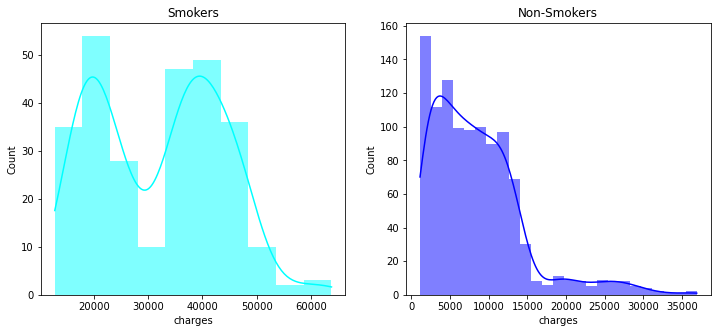

In [ ]:
# Distribition of the charges between smokers and non-smokers

plot = plt.figure(figsize=(12,5))

ax = plot.add_subplot(121)
sns.histplot(df_region[df_region.smoker == 1] ['charges'], color='cyan', ax=ax, kde=True, linewidth=0)
ax.set_title('Smokers')

ax = plot.add_subplot(122)
sns.histplot(df_region[df_region.smoker == 0] ['charges'], color='blue', ax=ax, kde=True, linewidth=0)
ax.set_title('Non-Smokers')

<Figure size 576x576 with 0 Axes>

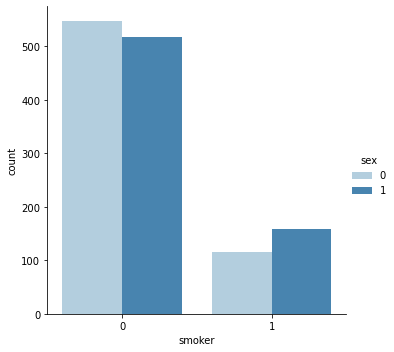

In [ ]:
# I want to have more information about smokers
plt.figure(figsize=(8,8))
sns.catplot(x='smoker', kind = 'count', hue='sex', palette='Blues', data = df_region)

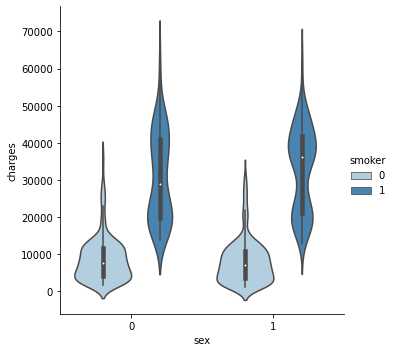

In [ ]:
# I want to have a visualization for the relation of sex, charges and smokes
sns.catplot(x='sex',y='charges',hue='smoker',palette='Blues',kind='violin',data=df_region)

<AxesSubplot:title={'center':'Box plot for charges for women'}, xlabel='charges', ylabel='smoker'>

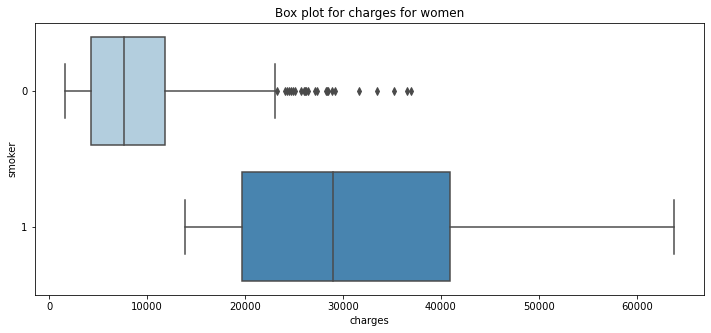

In [ ]:
# Lets see the relation between sex(gender) and smoker and charges using the box 
plt.figure(figsize=(12,5))
plt.title('Box plot for charges for women')
sns.boxplot(y='smoker',x='charges',data=df_region[(df_region.sex == 0)] , orient='h', palette='Blues')

<AxesSubplot:title={'center':'Box plot for charges for men'}, xlabel='charges', ylabel='smoker'>

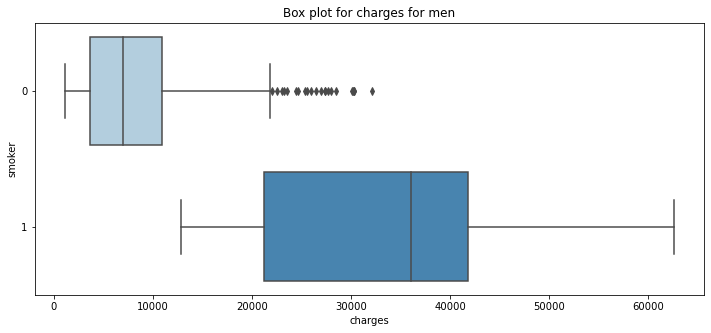

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Box plot for charges for men')
sns.boxplot(y='smoker',x='charges',data=df_region[(df_region.sex == 1)] , orient='h', palette='Blues')

<AxesSubplot:title={'center':'Distribution of age'}, xlabel='age', ylabel='Count'>

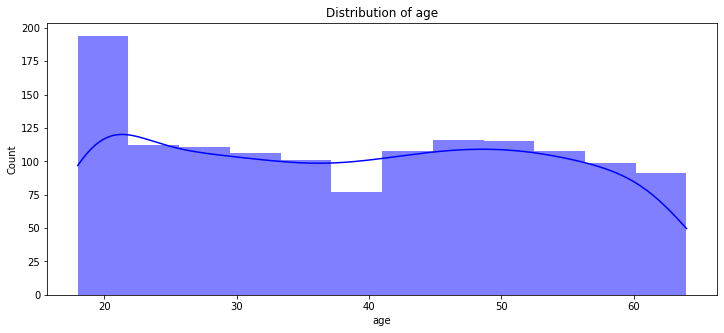

In [ ]:
# Lets see the connection between the age and the cost of the treatment
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
sns.histplot(df_region['age'], kde=True, color='blue', linewidth=0)

Text(0.5, 1.0, 'The number of smokers and non-smokers (age = 18)')

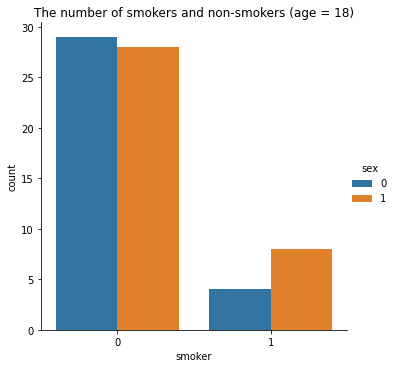

In [ ]:
# Gonna see the data of youth(age == 18) that smokes and that doesnt smoke
sns.catplot(x='smoker', kind='count', hue='sex',data=df_region[(df_region.age == 18)])
plt.title('The number of smokers and non-smokers (age = 18)')

<AxesSubplot:title={'center':'Box plot for charges of 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

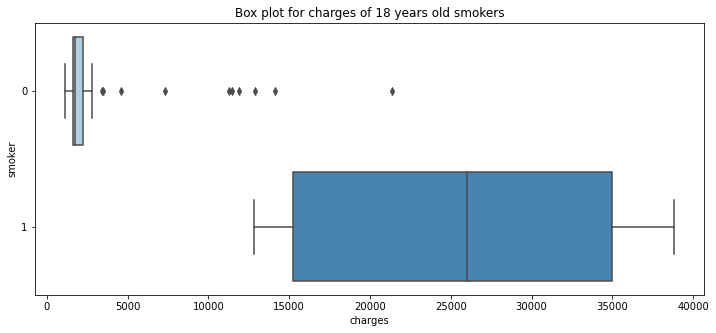

In [ ]:
# Lets see the cost
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of 18 years old smokers")
sns.boxplot(y='smoker', x='charges', data=df_region[(df_region.age == 18)], orient='h', palette='Blues')

<AxesSubplot:title={'center':'Distribution of BMI'}, xlabel='bmi', ylabel='Count'>

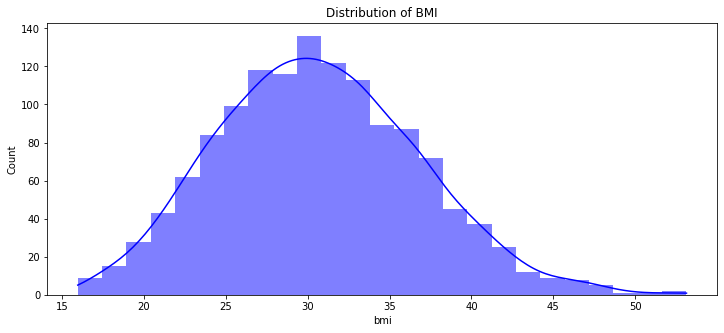

In [18]:
# Lets see the BMI
plt.figure(figsize=(12,5))
plt.title('Distribution of BMI')
sns.histplot(df_region['bmi'], kde=True, color='blue', linewidth=0)

The average BMI in patients is 30.

BMI range
BMI ----> Weight status

below 18.5 ----> Underweight

18.5 - 24.9 ----> Normal Weight

25.0 - 29.9 ----> Overweight

30.0 - 34.9 ----> Obeisty Class I

35.0 - 39.9 ----> Obesity Class II

Above 40 ----> Obesity Class III

<AxesSubplot:title={'center':'Distribution of charges for patient with BMI equal or higher than 30.0'}, xlabel='charges', ylabel='Count'>

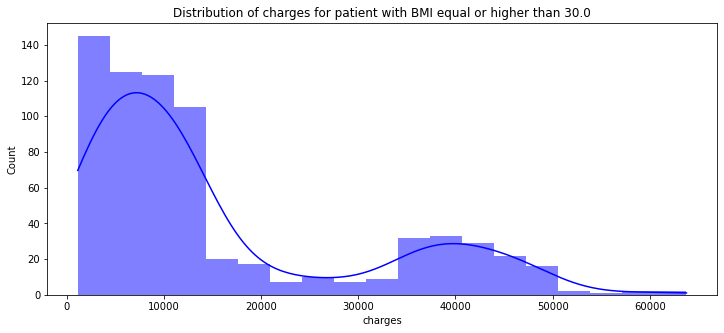

In [21]:
# Distribution of the charges for the different BMI (BMI => 30.0)
plt.figure(figsize=(12,5))
plt.title('Distribution of charges for patient with BMI equal or higher than 30.0')
sns.histplot(df_region[df_region.bmi >= 30] ['charges'], kde=True, color='blue', linewidth=0)


<AxesSubplot:title={'center':'Distribution of charges for patient with BMI lower than 30.0'}, xlabel='charges', ylabel='Count'>

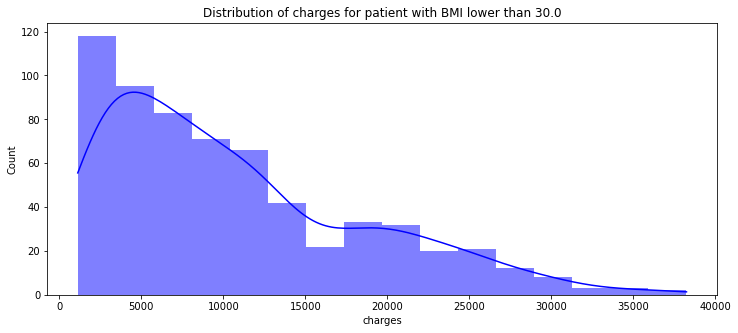

In [22]:
# Distribution of the charges for the different BMI (BMI < 30.0)
plt.figure(figsize=(12,5))
plt.title('Distribution of charges for patient with BMI lower than 30.0')
sns.histplot(df_region[df_region.bmi < 30] ['charges'], kde=True, color='blue', linewidth=0)

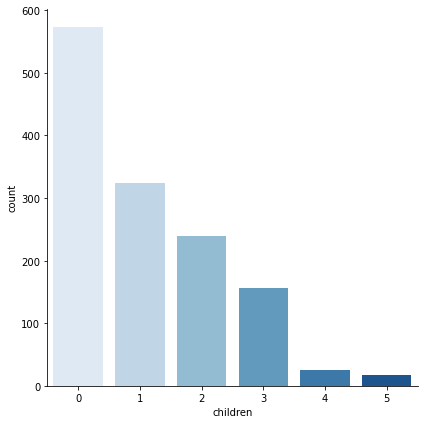

In [23]:
# Lets see the number of children per patient
sns.catplot(x='children', kind='count', palette="Blues", data=df_region, height=6)

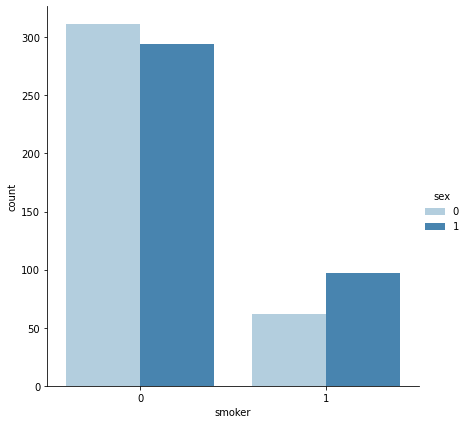

In [25]:
# Most of the patients have 0 children(don't have children)
# Lets see smokers with more than 0 childern
sns.catplot(x='smoker', kind='count', hue='sex', palette ="Blues",data=df_region[(df_region.children > 0 )], height=6)